In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 2s 0us/step


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.5294 - val_loss: 0.4614
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.4254 - val_loss: 0.4053
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3945 - val_loss: 0.3869
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3772 - val_loss: 0.3714
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3635 - val_loss: 0.3597


In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#addining a hidden layer
hiddenLayer=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [8]:
autoencoder1.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.5058 - accuracy: 0.4574 - val_loss: 0.4189 - val_accuracy: 0.4876
Epoch 2/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.3943 - accuracy: 0.4914 - val_loss: 0.3800 - val_accuracy: 0.4918
Epoch 3/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.3651 - accuracy: 0.4959 - val_loss: 0.3549 - val_accuracy: 0.4952
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.3439 - accuracy: 0.5002 - val_loss: 0.3371 - val_accuracy: 0.5001
Epoch 5/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3331 - accuracy: 0.5022 - val_loss: 0.3296 - val_accuracy: 0.4998


In [0]:
prediction = autoencoder1.predict(x_test[[3],:])
#prediction

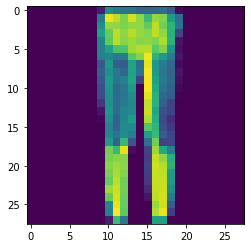

In [10]:
from matplotlib import pyplot as plt
plt.imshow(x_test[3].reshape(28,28))
plt.show()

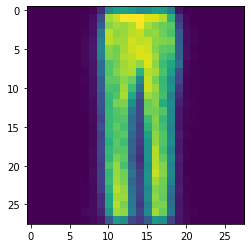

In [11]:
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

In [12]:

#Adding Noies
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
history=autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3352 - accuracy: 0.5016 - val_loss: 0.3193 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3305 - accuracy: 0.5023 - val_loss: 0.3141 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3280 - accuracy: 0.5026 - val_loss: 0.3114 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.3251 - accuracy: 0.5030 - val_loss: 0.3106 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3234 - accuracy: 0.5033 - val_loss: 0.3101 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3217 - accuracy: 0.5035 - val_loss: 0.3067 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [==============

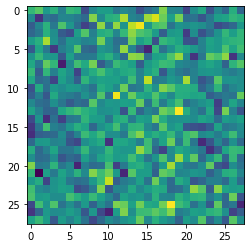

In [13]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[2].reshape(28,28))
plt.show()

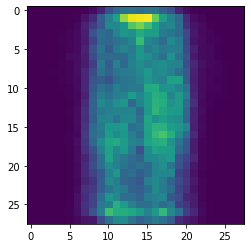

In [14]:

prediction1 = autoencoder1.predict(x_train_noisy[[2],:])
#prediction1[0]
from matplotlib import pyplot as plt
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

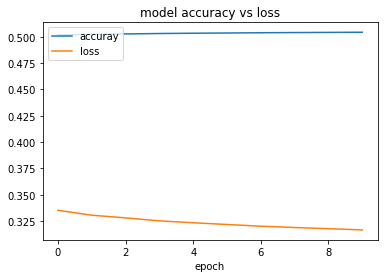

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()